# **Importing Libraries**

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# **Loading Data**

In [5]:
# Load the Excel file
file_path = "E-commerce_data.xlsx"

In [6]:
# Load all sheets into a dictionary of DataFrames
dfs = pd.read_excel(file_path, sheet_name=None)

In [7]:
# Now, you can access each sheet like this:
customers_df = dfs["customers"]
genders_df = dfs["genders"]
cities_df = dfs["cities"]
transactions_df = dfs["transactions"]
branches_df = dfs["branches"]
merchants_df = dfs["merchants"]

In [8]:
# Print the first few rows of each DataFrame
for sheet, df in dfs.items():
    print(f"Sheet: {sheet}")
    print(df.head(), "\n")

Sheet: customers
   customer_id  join_date  city_id  gender_id
0            1 2022-01-08        7          1
1            2 2023-05-02       20          2
2            3 2023-05-14       15          1
3            4 2022-11-25       11          2
4            5 2023-04-26        8          1 

Sheet: genders
   gender_id gender_name
0          1        Male
1          2      Female 

Sheet: cities
   city_id         city_name
0        1             Cairo
1        2        Alexandria
2        3              Giza
3        4  Shubra El-Kheima
4        5         Port Said 

Sheet: transactions
   transaction_id  customer_id transaction_date transaction_status  \
0               1          733       2024-05-11         subscribed   
1               2          631       2023-05-15             burned   
2               3          309       2022-11-13         subscribed   
3               4          695       2024-01-26         subscribed   
4               5          288       2022-10-12      

# **Merging Data**

In [10]:
customers_merged_df = pd.merge(customers_df, genders_df, on='gender_id', how='inner')

In [11]:
customers_merged_df = pd.merge(customers_merged_df, cities_df, on='city_id', how='inner')

In [12]:
transactions_merged_df = pd.merge(transactions_df, customers_merged_df, on='customer_id', how='inner')

In [13]:
transactions_merged_df = pd.merge(transactions_merged_df, branches_df, on='branch_id', how='inner')

In [15]:
full_df = pd.merge(transactions_merged_df, merchants_df, on='merchant_id', how='inner')

In [16]:
full_df.head(10)

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,join_date,city_id,gender_id,gender_name,city_name,merchant_id,merchant_name
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2023-05-16,15,2,Female,Aswan,7,Berry-Anderson
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5,2022-10-10,14,2,Female,Damietta,9,"Campbell, Shaffer and Martinez"
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7,2022-05-30,2,1,Male,Alexandria,7,Berry-Anderson
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2,2023-11-27,15,2,Female,Aswan,18,Lewis LLC
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6,2021-09-04,14,1,Male,Damietta,15,Butler-Gomez
5,6,307,2023-01-01,subscribed,gke-047,NaT,8,2021-12-20,2,1,Male,Alexandria,20,Griffin-Leblanc
6,7,812,2024-03-02,burned,Xrl-052,2024-03-19,1,2023-10-27,8,1,Male,El-Mahalla El-Kubra,11,"Smith, Lawson and Hernandez"
7,8,594,2024-04-23,burned,ogZ-906,2024-07-17,4,2024-01-30,3,1,Male,Giza,15,Butler-Gomez
8,9,966,2023-04-12,burned,dwn-619,2023-05-19,1,2022-10-13,12,1,Male,Fayyum,11,"Smith, Lawson and Hernandez"
9,10,914,2023-03-17,burned,Wjs-081,2023-04-22,1,2022-12-09,20,2,Female,Sohag,11,"Smith, Lawson and Hernandez"


# **Feature Scaling**

In [17]:
# Selecting features for clustering
features = full_df[['customer_id', 'transaction_id', 'branch_id']]

In [18]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [19]:
scaled_features[:5]

array([[ 0.77846695, -1.73170443,  0.50775366],
       [ 0.4231114 , -1.73101161, -0.18297367],
       [-0.69869729, -1.73031879,  0.50775366],
       [ 0.64607959, -1.72962597, -1.21906467],
       [-0.77185873, -1.72893315,  0.16239   ]])

# **K-Means Clustering**

In [20]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

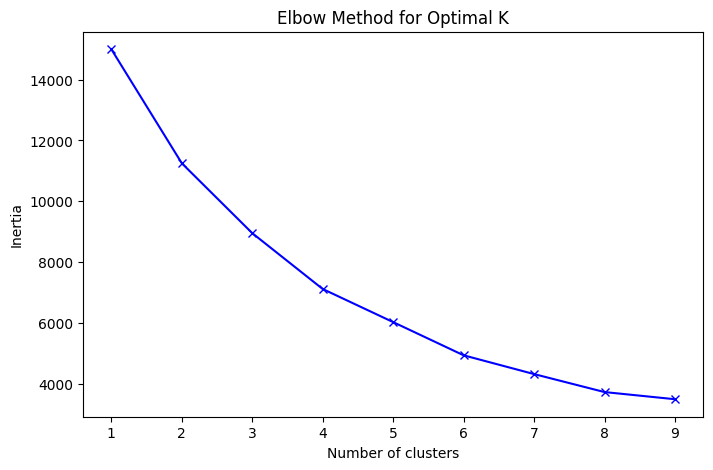

In [21]:
# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [22]:
# Choose optimal k (e.g., from elbow plot)
optimal_k = 3

# Apply K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [23]:
# Evaluate with Silhouette Score
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.2397523714830615


# **Analyzing Clusters**

In [24]:
# Add cluster labels to the DataFrame
full_df['cluster'] = clusters

In [25]:
# Analyze each cluster
for cluster in full_df['cluster'].unique():
    print(f"Cluster {cluster}:")
    print(full_df[full_df['cluster'] == cluster].describe())

Cluster 2:
       transaction_id  customer_id               transaction_date  \
count     1609.000000  1609.000000                           1609   
mean      1143.653822   678.044748  2023-10-25 14:01:16.072094208   
min          1.000000   184.000000            2021-08-29 00:00:00   
25%        530.000000   531.000000            2023-06-10 00:00:00   
50%       1107.000000   673.000000            2024-01-02 00:00:00   
75%       1719.000000   843.000000            2024-05-10 00:00:00   
max       2676.000000  1000.000000            2024-07-14 00:00:00   
std        708.827835   194.945455                            NaN   

                           burn_date    branch_id  \
count                            817  1609.000000   
mean   2023-12-02 02:19:14.467564288     5.133002   
min              2021-09-30 00:00:00     1.000000   
25%              2023-07-14 00:00:00     3.000000   
50%              2024-02-10 00:00:00     5.000000   
75%              2024-06-14 00:00:00     8.000000

In [26]:
full_df.head(10)

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,join_date,city_id,gender_id,gender_name,city_name,merchant_id,merchant_name,cluster
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2023-05-16,15,2,Female,Aswan,7,Berry-Anderson,2
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5,2022-10-10,14,2,Female,Damietta,9,"Campbell, Shaffer and Martinez",2
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7,2022-05-30,2,1,Male,Alexandria,7,Berry-Anderson,2
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2,2023-11-27,15,2,Female,Aswan,18,Lewis LLC,2
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6,2021-09-04,14,1,Male,Damietta,15,Butler-Gomez,2
5,6,307,2023-01-01,subscribed,gke-047,NaT,8,2021-12-20,2,1,Male,Alexandria,20,Griffin-Leblanc,2
6,7,812,2024-03-02,burned,Xrl-052,2024-03-19,1,2023-10-27,8,1,Male,El-Mahalla El-Kubra,11,"Smith, Lawson and Hernandez",2
7,8,594,2024-04-23,burned,ogZ-906,2024-07-17,4,2024-01-30,3,1,Male,Giza,15,Butler-Gomez,2
8,9,966,2023-04-12,burned,dwn-619,2023-05-19,1,2022-10-13,12,1,Male,Fayyum,11,"Smith, Lawson and Hernandez",2
9,10,914,2023-03-17,burned,Wjs-081,2023-04-22,1,2022-12-09,20,2,Female,Sohag,11,"Smith, Lawson and Hernandez",2
